In [7]:
from Data_Loader import load_data
from Train2 import trainCox_nnet

import torch
import numpy as np
import pandas as pd
from torch.utils.data.dataloader import DataLoader

In [8]:
dtype = torch.FloatTensor
''' Net Settings'''
In_Nodes = 55553 ###number of genes
Hidden_Nodes = 143 ###number of hidden nodes
Out_Nodes = 30 ###number of hidden nodes in the last hidden layer
''' Initialize '''
Initial_Learning_Rate = [0.03, 0.01, 0.001, 0.00075]
L2_Lambda = [0.1, 0.01, 0.005, 0.001]
num_epochs = 10 ###for grid search
Num_EPOCHS = 50 ###for training
###sub-network setup
Dropout_Rate = [0.7, 0.5]

In [9]:
from Data_extraction_normalised import output_dfnorm, data_norm_df  

In [4]:
# print(len(ytime_train))

In [10]:
data = pd.concat([data_norm_df,output_dfnorm],axis=1)

def split_indices(n, val_pct1, val_pct2):
	n1 = int(val_pct1*n)
	n2 = int(val_pct2*n)
	idxs = np.random.permutation(n)
	train, val, test = idxs[:n1], idxs[n1:n2], idxs[n2:]
	train.sort(), val.sort(), test.sort()
	return(train, val, test)

train_index, val_index, test_index = split_indices(len(data),0.6, 0.8)
print(train_index)
print(val_index)
print(test_index)
x, ytime, yevent, age = load_data(data, dtype)

# data_train = data.iloc[train_index]
# data_val = data.iloc[val_index]
# data_test = data.iloc[test_index]
# x_train, ytime_train, yevent_train, age_train = load_data(data_train, dtype)
# x_valid, ytime_valid, yevent_valid, age_valid = load_data(data_val, dtype)
# x_test, ytime_test, yevent_test, age_test = load_data(data_test,dtype)

[  0   1   3   6   7   8  10  11  14  16  17  18  19  20  21  22  23  24
  25  26  28  30  32  33  35  36  37  38  39  45  47  48  50  52  54  55
  56  57  58  59  62  66  70  71  73  74  77  78  80  81  83  84  85  88
  89  90  93  95  97 100 101 102 103 109 110 111 112 113 115 117 118 120
 122 123 125 126 127 128 129 135 136 138 141 143 144 145 146 148 149 150
 152 153 154 155 158 160 162 165 166 167 169 170 173 174 175 176]
[  2   4   9  12  15  29  34  41  42  44  51  60  61  64  65  69  72  75
  76  82  87  91  94  96 104 107 121 124 137 139 140 159 164 168 171]
[  5  13  27  31  40  43  46  49  53  63  67  68  79  86  92  98  99 105
 106 108 114 116 119 130 131 132 133 134 142 147 151 156 157 161 163 172]


In [11]:
from Data_Loader import CustomDataset
batch_size=10
data2 = CustomDataset(x, ytime, yevent, age)
train_loader = DataLoader(data2, batch_size, sampler=train_index)
val_loader = DataLoader(data2, batch_size, sampler=val_index)

In [7]:
# print(np.shape(torch.cat((x_train, age_train),1)))
# for i in train_sampler: 
#     print(i)
# for k in train_sampler: 
#     print(k)
# # print(data_train2['x_train'])
# k=0
# for batch in train_loader: 
#     x_train_b, ytime_train_b, yevent_train_b, age_train_b = batch
#     print(np.shape(x_train_b))
    # x_train, ytime_train, yevent_train, age_train = batch
#     print(batch)
#  print(len(torch.cat((x_train, ytime_train, yevent_train, age_train),1)))
# print(data_train2['vital_status'])
# for batch in train_loader: 
#     print(batch)


In [12]:
opt_l2_loss = 0
opt_lr_loss = 0
opt_do_loss = 0
opt_loss = torch.Tensor([float("Inf")])
###if gpu is being used
if torch.cuda.is_available():
	opt_loss = opt_loss.cuda()
###
opt_c_index_va = 0
opt_c_index_tr = 0

In [17]:
for l2 in L2_Lambda:
	for lr in Initial_Learning_Rate:
		for do in Dropout_Rate:
			history_train, history_val = trainCox_nnet(train_loader, \
				val_loader, \
				In_Nodes, Hidden_Nodes, Out_Nodes, \
				lr, l2, num_epochs, do)
			loss_train2 = [k['loss'] for k in history_train]
			if loss_train2[-1] =='nan': 
				break
			elif loss_train2[-1] < opt_loss:
				opt_l2_loss = l2
				opt_lr_loss = lr
				opt_do_loss = do
				opt_loss = loss_train2[-1]
				# opt_c_index_tr = c_index_tr
				# opt_c_index_va = c_index_va
			print ("L2: ", l2, "LR: ", lr, "Loss in Validation: ", opt_loss)

Epoch [0], loss: nan, c_index: 0.0000
Epoch [1], loss: nan, c_index: 0.0000
Epoch [2], loss: nan, c_index: 0.0000
Epoch [3], loss: nan, c_index: 0.0000
Epoch [4], loss: nan, c_index: 0.0000
Epoch [5], loss: nan, c_index: 0.0000
Epoch [6], loss: nan, c_index: 0.0000
Epoch [7], loss: nan, c_index: 0.0000
Epoch [8], loss: nan, c_index: 0.0000
Epoch [9], loss: nan, c_index: 0.0000
Epoch [10], loss: nan, c_index: 0.0000
L2:  0.1 LR:  0.03 Loss in Validation:  tensor([inf])
Epoch [0], loss: nan, c_index: 0.0000
Epoch [1], loss: nan, c_index: 0.0000
Epoch [2], loss: nan, c_index: 0.0000
Epoch [3], loss: nan, c_index: 0.0000
Epoch [4], loss: nan, c_index: 0.0000
Epoch [5], loss: nan, c_index: 0.0000
Epoch [6], loss: nan, c_index: 0.0000
Epoch [7], loss: nan, c_index: 0.0000
Epoch [8], loss: nan, c_index: 0.0000
Epoch [9], loss: nan, c_index: 0.0000
Epoch [10], loss: nan, c_index: 0.0000
L2:  0.1 LR:  0.03 Loss in Validation:  tensor([inf])
Epoch [0], loss: nan, c_index: 0.0000
Epoch [1], loss:

In [13]:
opt_l2_loss, opt_lr_loss, opt_do_loss = 0.005, 0.001, 0.5
print(opt_l2_loss, opt_lr_loss, opt_do_loss)

0.005 0.001 0.5


In [14]:
###train Cox-PASNet with optimal hyperparameters using train data, and then evaluate the trained model with test data
###Note that test data are only used to evaluate the trained Cox-nnet
history_train, history_val = trainCox_nnet(train_loader, \
			val_loader, \
			In_Nodes, Hidden_Nodes, Out_Nodes, \
			opt_lr_loss, opt_l2_loss, Num_EPOCHS, opt_do_loss)
print ("Optimal L2: ", opt_l2_loss, "Optimal LR: ", opt_lr_loss)
# print("C-index in Test: ", c_index_te)



Epoch [0], loss: 2.0780, c_index: 0.4899
Epoch [1], loss: 1.4049, c_index: 0.4483
Epoch [2], loss: 1.3293, c_index: 0.5641
Epoch [3], loss: 1.3286, c_index: 0.5434
Epoch [4], loss: 1.3438, c_index: 0.4946
Epoch [5], loss: 1.4359, c_index: 0.4755
Epoch [6], loss: 1.6637, c_index: 0.4874
Epoch [7], loss: 2.0321, c_index: 0.5097
Epoch [8], loss: 2.4711, c_index: 0.4770
Epoch [9], loss: 2.4709, c_index: 0.5083
Epoch [10], loss: 2.0269, c_index: 0.4648
Epoch [11], loss: 1.5821, c_index: 0.4228
Epoch [12], loss: 1.4519, c_index: 0.4956
Epoch [13], loss: 1.7643, c_index: 0.5170
Epoch [14], loss: 1.8494, c_index: 0.4995
Epoch [15], loss: 1.6489, c_index: 0.5173
Epoch [16], loss: 1.8394, c_index: 0.4871
Epoch [17], loss: 2.4306, c_index: 0.5493
Epoch [18], loss: 2.7951, c_index: 0.5151
Epoch [19], loss: 1.7031, c_index: 0.4691
Epoch [20], loss: 1.6989, c_index: 0.5492
Epoch [21], loss: 1.5323, c_index: 0.4917
Epoch [22], loss: 1.9478, c_index: 0.3823
Epoch [23], loss: 2.1043, c_index: 0.5925
Ep

In [20]:
# print(history_train)
# print(history_val)

In [15]:
loss_train2 = [k['loss'] for k in history_train]
loss_val2 = [k['loss'] for k in history_val] 
c_index_tr2 = [k['c_index'] for k in history_train]
c_index_val2 = [k['c_index'] for k in history_val]

epoch = np.arange(0,Num_EPOCHS+1)


In [16]:
# loss_train2 = [k.detach().numpy() for k in loss_train]
# loss_test2 = [k.detach().numpy() for k in loss_test]
# c_index_tr2 = [k.detach().numpy() for k in c_index_tr]
# c_index_te2 = [k.detach().numpy() for k in c_index_te]
# epoch = np.arange(0,Num_EPOCHS+2,2)

In [17]:
print(loss_train2)
# print(len(yevent_train))

[1.8437035083770752, 1.475620150566101, 1.3375219106674194, 1.3538235425949097, 1.3769015073776245, 1.4280104637145996, 1.4787708520889282, 1.5113043785095215, 1.500483751296997, 1.3397579193115234, 1.2428691387176514, 1.190316081047058, 1.280808925628662, 1.0961731672286987, 0.9680767059326172, 0.8865864276885986, 0.9403305649757385, 0.8408138751983643, 0.8322969079017639, 1.3153581619262695, 0.9802183508872986, 0.8473415970802307, 0.7205291390419006, 0.7191141843795776, 0.7780330181121826, 1.0520983934402466, 0.8208772540092468, 0.8074853420257568, 0.8218759894371033, 0.6186901330947876, 0.65234375, 0.6995696425437927, 0.6017599105834961, 0.6242838501930237, 0.6411771774291992, 0.6498752236366272, 1.5774753093719482, 0.896436333656311, 0.7158912420272827, 0.6236613988876343, 0.6146040558815002, 0.5826364159584045, 0.711649477481842, 0.7877984642982483, 0.5862349271774292, 0.5626866817474365, 0.4631791114807129, 0.5355844497680664, 0.6509777307510376, 0.4081716239452362, 0.46240475773

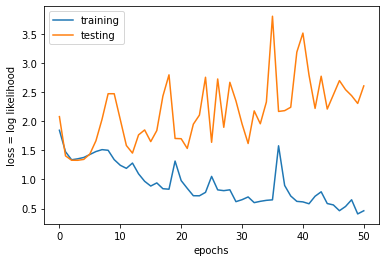

In [18]:
import matplotlib.pyplot as plt 
plt.plot(epoch, loss_train2, label = 'training')
plt.plot(epoch, loss_val2, label = 'testing')
plt.ylabel('loss = log likelihood')
plt.xlabel('epochs')
plt.legend()



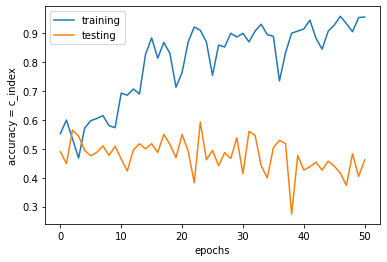

In [19]:
import matplotlib.pyplot as plt 
plt.plot(epoch, c_index_tr2, label = 'training')
plt.plot(epoch, c_index_val2, label = 'testing')
plt.ylabel('accuracy = c_index')
plt.xlabel('epochs')
plt.legend()


In [18]:
print(c_index_te[-1])

NameError: name 'c_index_te' is not defined

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')


In [ ]:
get_default_device()

device(type='cpu')

In [ ]:
from Survival_CostFunc_CIndex import R_set, neg_par_log_likelihood, c_index
from Model2 import Cox_nnet

net = Cox_nnet(In_Nodes, Hidden_Nodes, Out_Nodes)
net.eval()
test_pred = net(x_test, age_test)
eval_loss = []
eval_cindex=[]
eval_loss.append(neg_par_log_likelihood(test_pred, ytime_test, yevent_test).view(1,))
eval_cindex.append(c_index(test_pred, ytime_test, yevent_test))

In [ ]:
print(eval_loss, eval_cindex)

[tensor([7.7761], grad_fn=<ViewBackward0>)] [tensor(0.4251)]


In [ ]:
len(x_test)

36

In [20]:
print(x_df2.head())

                                                      0       1        2      \
filename                                                                       
002de81c-60f8-4933-a0ea-43701990ac43.rna_seq.au...  11.3868  0.0000  50.6176   
0086025e-db16-446f-83fe-27951b5cfbdb.rna_seq.au...   2.3859  0.0000  23.4719   
00bb756b-d7e2-4008-9a96-a706e43649eb.rna_seq.au...  10.1327  0.0000  28.4261   
033fbcc1-7984-4946-ba49-cd58bb641b0b.rna_seq.au...   5.4020  0.0000  34.7283   
06a1d5c5-ecc0-426b-aba8-d5e0ca289c8f.rna_seq.au...   5.6455  0.0196  23.0461   

                                                     3       4       5      \
filename                                                                     
002de81c-60f8-4933-a0ea-43701990ac43.rna_seq.au...  1.7910  0.8880  3.9569   
0086025e-db16-446f-83fe-27951b5cfbdb.rna_seq.au...  1.8908  0.2524  0.9722   
00bb756b-d7e2-4008-9a96-a706e43649eb.rna_seq.au...  2.1367  1.5879  1.9484   
033fbcc1-7984-4946-ba49-cd58bb641b0b.rna_seq.au..